## Kaggle Competition on the Titanic Data

In [849]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [850]:
#reading the train dataset
train = pd.read_csv(r'/Users/clementngatia/titanic_kagglecompe/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [851]:
#reading the test dataset
test = pd.read_csv(r'/Users/clementngatia/titanic_kagglecompe/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EXPLORATORY DATA ANALYSIS

We only perform EDA on the train data only in order to understand the features of our passengers

In [852]:
#reviewing the details of the df
print(train.shape)
print(train.size)
print(train.info())

(891, 12)
10692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Since there are 891 entries, we can see that Age, Cabin and Embarked have some null values. We'll address them before modelling.

In [853]:
# Statistical analysis of numerical continuous and discrete data.
train[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Average age of the passengers was 30 yrs with 50% of the passengers being 28 years and below.
The average fare was $49, the highest being 512.

In [854]:
#Let's check out the fares since we can see at least one that has a fare of 0.0
fare_0 = train.loc[train['Fare']== 0]
fare_0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


- There are 15 passengers with fares=0, this may have been the crew and captains.
- It also appears that all were male and from Southampton.
- Some also had ticket numbers that were
- Only 1 survived.

In [855]:
#Seeing the value counts of the remaining quantifiable data.
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']
for i in cols:
    print(f"Value Counts for column {i} :")
    print(train[i].value_counts())
    print()

Value Counts for column Survived :
Survived
0    549
1    342
Name: count, dtype: int64

Value Counts for column Pclass :
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value Counts for column Sex :
Sex
male      577
female    314
Name: count, dtype: int64

Value Counts for column SibSp :
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Value Counts for column Parch :
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Value Counts for column Embarked :
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



 - 549 people died while 342 people survived.
 - There were 216 people in 1st class, 184 people in 2nd class and 491 people in 3rd class.
 - 577 people were male, while 314 were female.
 - 644 people embarked at Southampton, 168 at Cherbourg and 77 at Queenstown
 - Those who had no siblings or spouses were 608 and those who had neither parent nor children on board were 644


### Plotting the distributions

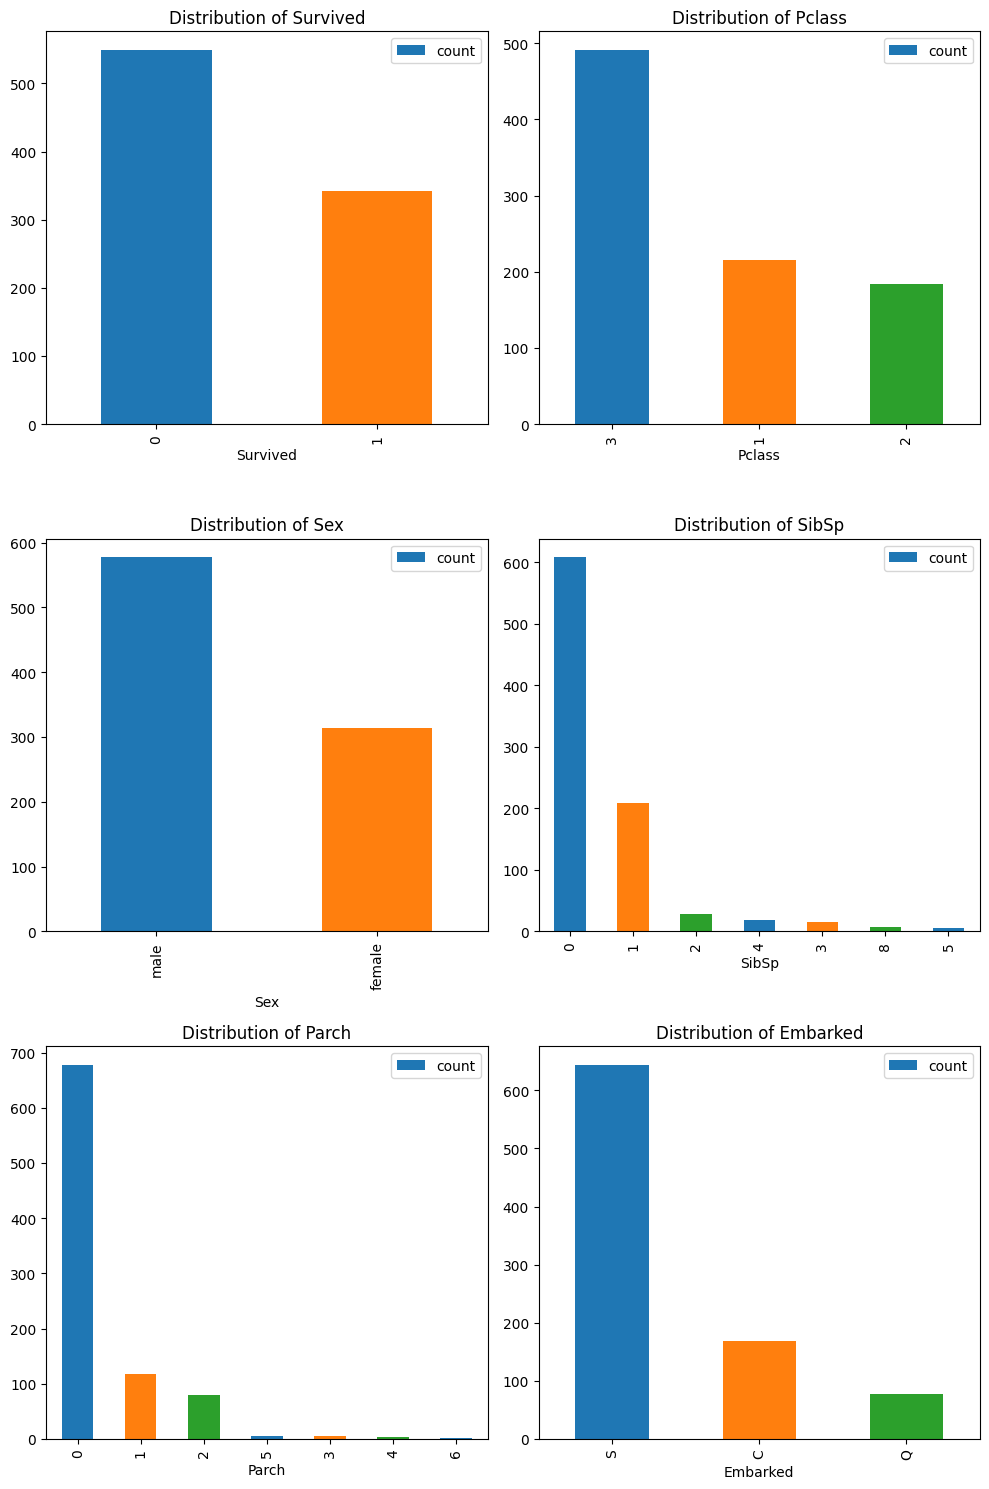

In [856]:
cols_plot = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']
fig, axes = plt.subplots(3,2, figsize=(10,15))
axes = axes.flatten()


for idx,i in enumerate(cols_plot):
    value_counts = train[i].value_counts()
    value_counts.plot(kind="bar", ax=axes[idx], color=['#1f77b4', '#ff7f0e', '#2ca02c'],)
    axes[idx].set_title(f"Distribution of {i}")
    axes[idx].legend()
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

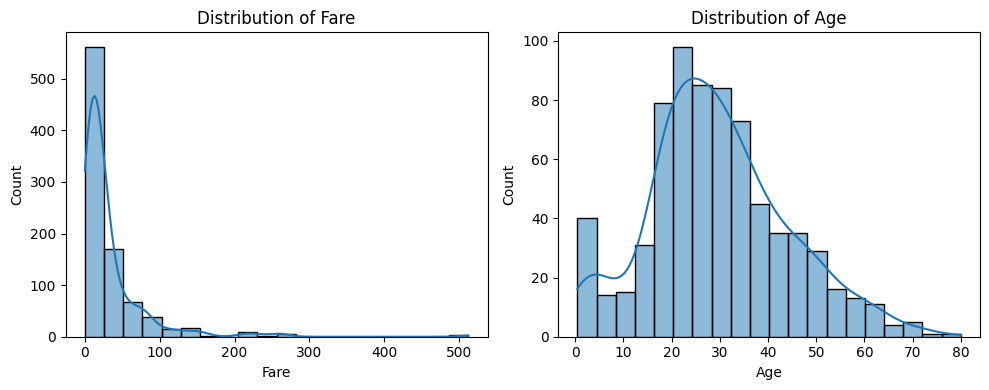

In [857]:
#Let's plot the distribution of age and fare as a histogram

fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.histplot(train, x='Fare', kde = True, ax=axes[0], bins=20)
axes[0].set_title("Distribution of Fare")
axes[0].set_xlabel("Fare")
axes[0].set_ylabel("Count")

sns.histplot(train, x='Age', kde = True, ax=axes[1], bins=20)
axes[1].set_title("Distribution of Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")


plt.tight_layout()
plt.show()

 **Age** 
 - Most people were between the ages of 16yrs and 36yrs.
 
**Fare** 
- Most of the fares paid were between 0 and 50. The histogram is skewed to the left with several outliers of fares of upto 500.


## Bi-variate Analysis (Survival status)

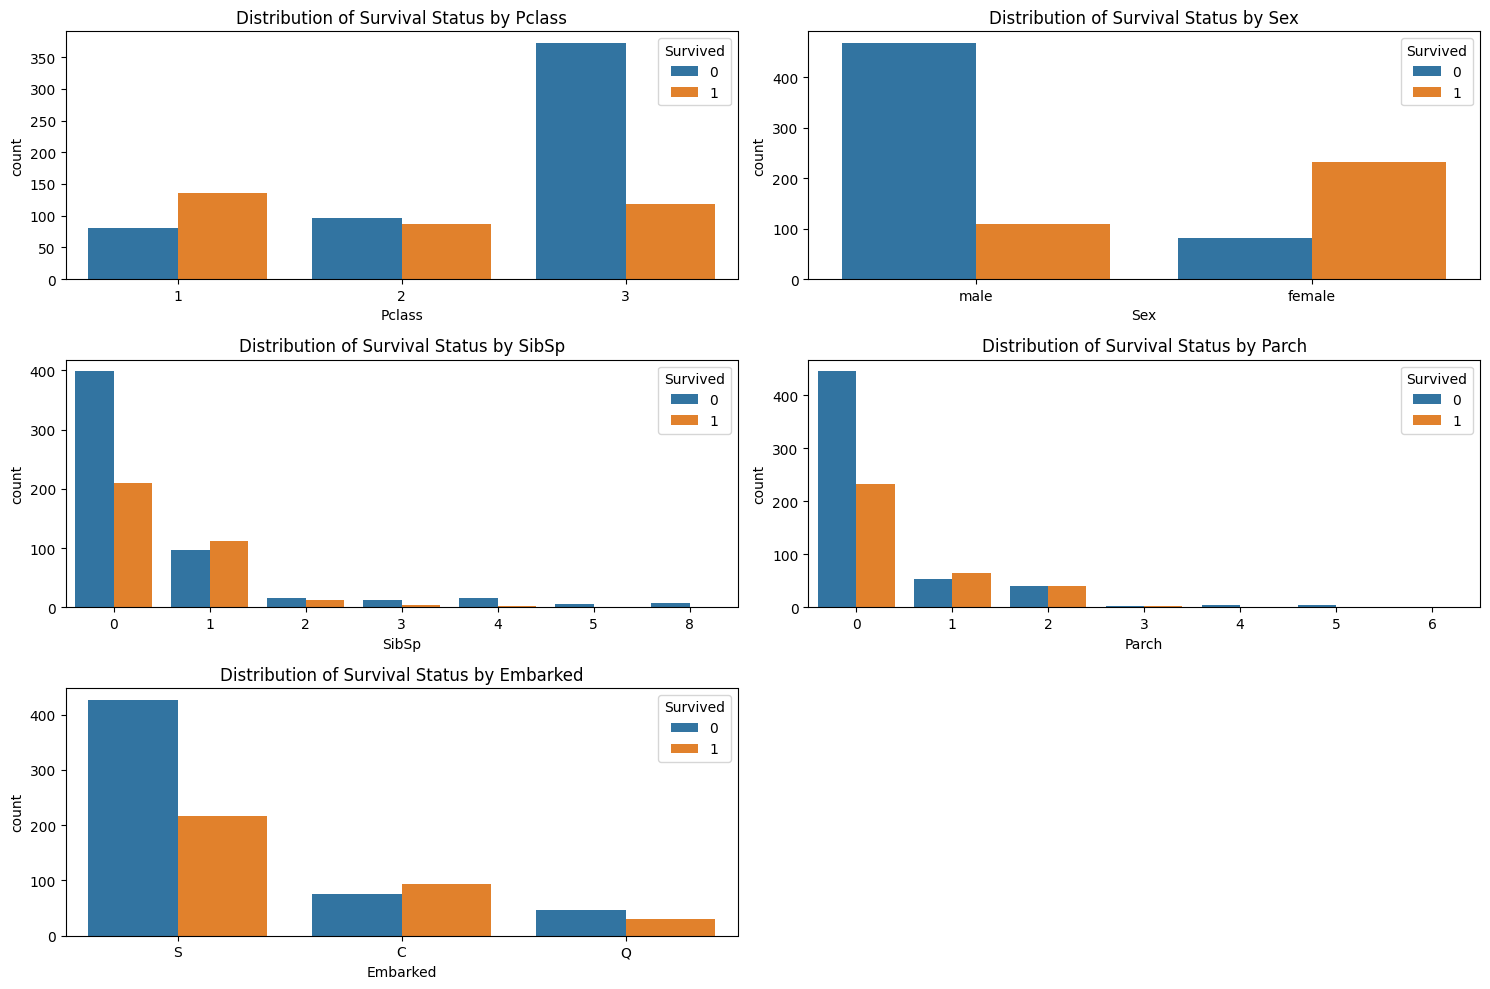

In [858]:
#plotting columns by survival status
cols_plot = ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked']
fig, axes = plt.subplots(3,2, figsize=(15,10))
axes = axes.flatten()

colors = {0: "red", 1: "blue"}
for idx,col in enumerate(cols_plot):
    sns.countplot(data=train, x=col, ax=axes[idx],hue='Survived')
    axes[idx].set_title(f"Distribution of Survival Status by {col}")
    axes[idx].grid(False)

if len(cols_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

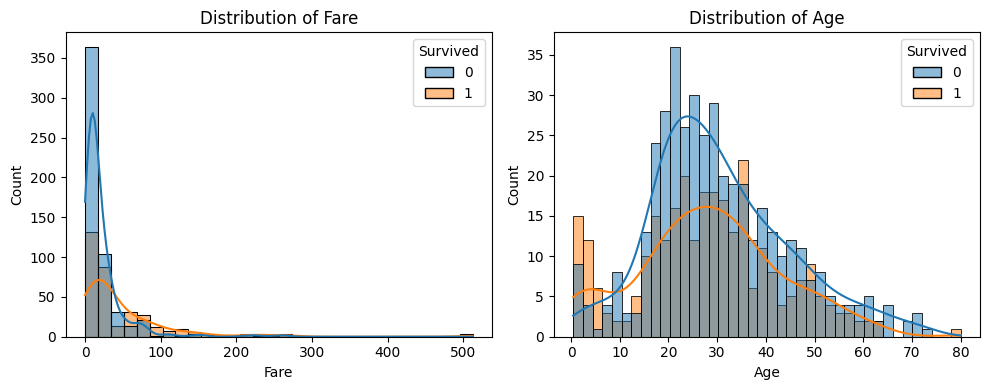

In [859]:
#plotting fare and age by survival status
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.histplot(train, x='Fare', kde = True, ax=axes[0], bins=30, hue='Survived')
axes[0].set_title("Distribution of Fare")
axes[0].set_xlabel("Fare")
axes[0].set_ylabel("Count")

sns.histplot(train, x='Age', kde = True, ax=axes[1], bins=40, hue='Survived')
axes[1].set_title("Distribution of Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")


plt.tight_layout()
plt.show()

#### **Insights on the Survival Status**
**Passenger Class**
- Most people who died were in the passenger class 3. More people survived than died in Pclass 1, while the other classes 2 and 3 had the opposite.

**Sex**
- More men died than survived while more women survived than died.

**Family**
- More of those who did not have any siblings, spouses, parents or children died.

**Embarked**
- Southampton and Queenstown had more of the people died rather than survived while more of those who embarked at Cherbourg survived.

**Fare**
- Those who paid fares above 50 generally had higher survival rate than those who paid less than 50. The distribution for both still left skewed.

**Age**
- Passengers younger than 10 years had better survival rate. 34-36yrs and 48-50yrs olds survived more than they died. 

### Correlation Analysis.

In [860]:
#counts of passenger class by gender
contingency_table = pd.crosstab([train['Pclass']], [train['Sex']])
print(contingency_table)


Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


In [861]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


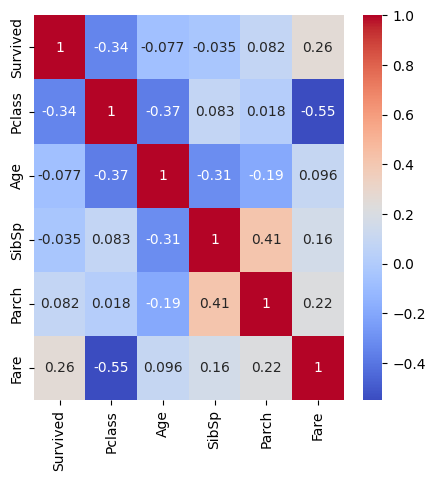

In [862]:
#Creating a correlation heatmap of the numerical columns
plt.figure(figsize=(5,5))
num_cols = train[['Survived','Pclass','Age','SibSp','Parch','Fare']]
sns.heatmap(data=num_cols.corr(), cmap='coolwarm', annot=True)
plt.show()

### Insights from Correlation Heatmap
**Positive correlations**
- Sibsp and Parch: There is a positive correlation between those who had siblings and spouses and those who had either parents or children.(0.41)

- Fare and Survived: Higher fares increased the chances of survival. Lower fares reduced chances of survival.(0.26)

- Parch and Fare: The higher the no of parents/children, the higher the fares were.(0.22)

- SibSp and Fare: The more the number of siblings or presence of spouse, the higher the fares.(0.16)

**Negative Correlations**
- Passenger Class and Survived: The higher the passenger class, the lower the occurence of those who survived.(-0.34)

- Passenger Class and age: The higher the passenger class, the lower the age of the boarder.(-0.37)

- Passenger class and Fare: The higher the passenger class, the lower the fare.(-0.55)

- Age and Sibsp: The higher the age, the lower the likelihood to be accompanied by a spouse/siblings.(-0.31)

- Age and Parch: The The higher the age, the less likely a person was to be accompanied by their parents/children.(-0.19)


# PRE-PROCESSING

We will work on the combined df to ensure that changes applied to the train df are also applied to the test df.

In [863]:
# Combining the train and test csvs.
titanic = pd.concat([train, test], ignore_index=True, sort  = False)

Whatever we do to the train-set, we do to the test-set to avoid data leakage.

#### Train DF

In [864]:
#checking on the train df again.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 1a. Dealing with nulls

In the train df Age and Embarked have null values. 
- We will fill the age with the mean because the distribution was almost normal.
- We will fill embarked with the mode since it is categorical.

In [865]:
#Filling the age nulls in the train df.
train.fillna({'Age': train.Age.mean()}, inplace=True)

In [866]:
#Filling the Embarked nulls in the train df
train.fillna({'Embarked': 'S'}, inplace=True)

The Name, Cabin and Ticket Columns are not only categorical, they are unique and have no predictive usefulness.

In [867]:
#dropping Name, Cabin and Ticket from the train df
train.drop(columns=['Name','Cabin','Ticket'], inplace=True)

##### 1b. Encoding


In [868]:
#Finding the unique counts of Sex
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [869]:
#Finding the unique counts of Embarked
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

We'll do one-hot encoding for Sex since there are two unique values, male and female.

We'll also do one-hot encoding for Embarked since there is no importance allocated to the different ports.



In [870]:
# #Encoding Sex and Embarked and confirming the details
train =  pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


In [871]:
#converting them from boolean to int 
train['Embarked_Q'] = train.Embarked_Q.astype(int)
train['Embarked_S'] = train.Embarked_S.astype(int)
train['Sex_male'] = train.Sex_male.astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    int64  
 8   Embarked_Q   891 non-null    int64  
 9   Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [872]:
#confirming the data is numerical
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


##### 1c. Standard Scaling

In [873]:
#Checking on the test df
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


##### 2a. Dealing with nulls

In the test df Age and Fare have null values.
- We will fill Age with the mean (assuming normal distribution from the train set)
- We will fill Fare with the median since the training set had a left-skew and a mean may not be an accurate representation of the middle point.

In [874]:
#Filling in the null values in the tes

test.fillna({'Age': test.Age.mean()}, inplace=True)
test.fillna({'Fare': test.Fare.median()}, inplace=True)

In [875]:
#Dropping the name, cabin and Ticket columns
test.drop(columns=['Name','Cabin','Ticket'], inplace=True)

##### 2b. Encoding

In [876]:
#Confirming unique values of Sex
test.Sex.unique()

array(['male', 'female'], dtype=object)

In [877]:
#Confirming unique values of Embarked
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [878]:
# Encoding the Sex and Embarked columns 
test =  pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Sex_male     418 non-null    bool   
 7   Embarked_Q   418 non-null    bool   
 8   Embarked_S   418 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 20.9 KB


In [879]:
# Converting the boolean dtypes to interger
test['Embarked_Q'] = test.Embarked_Q.astype(int)
test['Embarked_S'] = test.Embarked_S.astype(int)
test['Sex_male'] = test.Sex_male.astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Sex_male     418 non-null    int64  
 7   Embarked_Q   418 non-null    int64  
 8   Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


# MODELLING

In [880]:
# Dropping the target from the train csv
X = train.drop(columns=['Survived'])
y = train.Survived

In [881]:
#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [882]:
#scaling using a standard scaler. Fitting on the train set and only transforming on the both test set.

#Fitting scaler on the train test.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Also scaling the separate test data.
test2 = scaler.transform(test)

Let's attempt 2 models to see what works best:
1. Logistic regression - works well with binary outcomes.
2. Decision Trees - to minimize the importance of unimportant features.

#### **1. Logistic Regression**

In [883]:
#Initializing the regression
logreg = LogisticRegression(random_state=42,class_weight='balanced', penalty='l2', solver='lbfgs', C=1)

In [884]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=42)

In [885]:
#prediction using the x test set.
y_pred = logreg.predict(X_test_scaled)

##### Evaluating the model

In [886]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       105
           1       0.74      0.82      0.78        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.81      0.81       179



In [887]:
#Looking at the feature importance.
coefficients = logreg.coef_[0]
features_log = X.columns
importance_log = pd.DataFrame({'Feature': features_log, 'Coefficents': coefficients, 'Importance': abs(coefficients)}).sort_values(by='Importance', ascending=False)
print(importance_log)

       Feature  Coefficents  Importance
6     Sex_male    -1.256427    1.256427
1       Pclass    -0.747585    0.747585
2          Age    -0.434871    0.434871
3        SibSp    -0.351111    0.351111
8   Embarked_S    -0.195699    0.195699
5         Fare     0.143721    0.143721
4        Parch    -0.108848    0.108848
0  PassengerId     0.079200    0.079200
7   Embarked_Q    -0.055564    0.055564


The Logistic Regression has an accuracy score of 81% with these features being important:
- The gender, Passenger class, Age and having siblings/spouses had an impact on survival

#### **2. Decision trees**

In [888]:
#Using a classifier because the matter is a classification problem.
from sklearn.tree import DecisionTreeClassifier

In [889]:
#Initializing the Decision Tree
dt = DecisionTreeClassifier(max_depth=5)


In [890]:
#Fitting
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

In [891]:
#Predicting
y_dt_pred = dt.predict(X_test_scaled)

In [892]:
#Evaluating the model
print('Classification Report: ',classification_report(y_test, y_dt_pred))


Classification Report:                precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [893]:
#Looking at the feature importance.
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_dt

,Feature,Importance
6,Sex_male,0.521513
1,Pclass,0.180401
5,Fare,0.088364
2,Age,0.074620
0,PassengerId,0.073622
3,SibSp,0.041442
8,Embarked_S,0.012506
4,Parch,0.007531
7,Embarked_Q,0.000000


This model rated at an accuracy of 79%, a little lower than the Logistic regression method. 
- Sex, Passenger Class, Age and Fare have more importance here.

#### **3. Ensemble methods: Random Forest**

In [894]:
from sklearn.ensemble import RandomForestClassifier


In [895]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [896]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [897]:
y_rfc_pred = rfc.predict(X_test_scaled)

In [898]:
#Evaluating the model
print('Classification Report: ', classification_report(y_test, y_rfc_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [899]:
#Looking at the feature importance.
feature_importance_rfc = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_rfc

,Feature,Importance
6,Sex_male,0.259958
0,PassengerId,0.192030
5,Fare,0.190115
2,Age,0.172358
1,Pclass,0.084361
3,SibSp,0.040516
4,Parch,0.029079
8,Embarked_S,0.023111
7,Embarked_Q,0.008471


This model (Random Forest) has a slightly higher accuracy score than the others at 83%.
- It ranks Sex, PassenderID, Fare and Age as most important.

# PREDICTING

We'll use the logistic regression details because even though the accuracy is lower than the Random Forest model, it's feature importances are consistent with the Decision Tree model.

The passenger ID has also been rightfully penalized.

In [900]:
#Creating predictons using the logreg.
test_pred = logreg.predict(test2)
test_pred.shape

(418,)

In [903]:
#Converting the prediction to a dataframe
predictions_df = pd.DataFrame({'PassengerID': test.PassengerId, 'Predictions': test_pred}).set_index('PassengerID')

In [904]:
#Converting to csv format for submission.
predictions_df.to_csv('titanic_pred.csv')

In [905]:
#
print(predictions_df.head)

<bound method NDFrame.head of              Predictions
PassengerID             
892                    0
893                    1
894                    0
895                    0
896                    1
...                  ...
1305                   0
1306                   1
1307                   0
1308                   0
1309                   0

[418 rows x 1 columns]>


In [906]:
pd.read_csv(r'/Users/clementngatia/titanic_kagglecompe/titanic_pred.csv')

,PassengerID,Predictions
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
